## Vergleich der RAG-Varianten

Nachdem wir in *Experiment 1* (naives RAG) und *Experiment 2* (advanced RAG)  
Antworten auf unsere synthethisch-erstellten Fragen generiert **und** mit der 
RAG-Triade bewertet haben, können wir beide Systeme systematisch vergleichen.

### Bewertete Metriken

| Kategorie | Metrik | Bedeutung |
|-----------|--------|-----------|
| Qualitativ | **Context Relevancy** | Wie relevant ist der bereitgestellte Kontext für die beantwortung Frage? |
| | **Answer Relevancy** | Wie relevant ist die generierte Antwort für die Frage? |
| | **Faithfulness** | Reproduziert die Antwort ausschließlich Fakten aus dem Kontext? |
| Quantitativ | **Latenz** | Durchschnittliche Laufzeit pro Anfrage in Sekunden |
| | **Kontext-Länge** | Summe der Wörter im abgerufenen Kontext &rightarrow; dient als grobe Kostenschätzung\* |

\* Token-Kosten wären genauer, aber sie korrelieren mit der Wortzahl, daher reicht dies als proxy für einen Kostenvergleich



In [1]:
import os
os.chdir("/workspace")

import json, re, math
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Alle Auswertungsfunktionen liegen in `src/utils/get_plots.py` vor.
Dort befinden sich

* **`get_stats_for_metrics()`** – liest eine rated JSON-Datei ein und liefert die Mittelwerte und den Standardfehler
* **`plot_rag_metrics()`** – erzeugt die bar plots die einzelnen System

In [2]:
from src.utils.get_plots import get_stats_for_metrics 

# define input files (corresponding RAG outputs) and assign method names
file_list = [
    "results/simple_rag_res_rated.json", 
    "results/advanced_rag_res_rated.json"]

method_names = {
    file_list[0]: "naive RAG",
    file_list[1]: "advanced RAG",
}

# compute detailed and summary statistics for each method
detailed_dfs, metrics_dfs = {}, {}

for fp in file_list:
    det, summ         = get_stats_for_metrics(fp)
    label             = method_names.get(fp, Path(fp).stem)
    detailed_dfs[label] = det
    metrics_dfs[label]  = summ


### Visualisierung

Das folgende Plot zeigt:

* RAG-Triade (Mittelwert ± SEM); einzelne Punkte = Werte pro Query  

* Latenz in Sekunden 

* Kontext-Länge in absoluter Wortzahl

So lässt sich auf einen Blick erkennen, **wo** das fortgeschrittene System wirklich besser ist und **was** es an Performance- bzw. Kosten-Aufwand bedeutet.


/workspace/src/utils/get_plots.py:102: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_top.set_yticklabels(ytick_labels)
/workspace/src/utils/get_plots.py:161: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


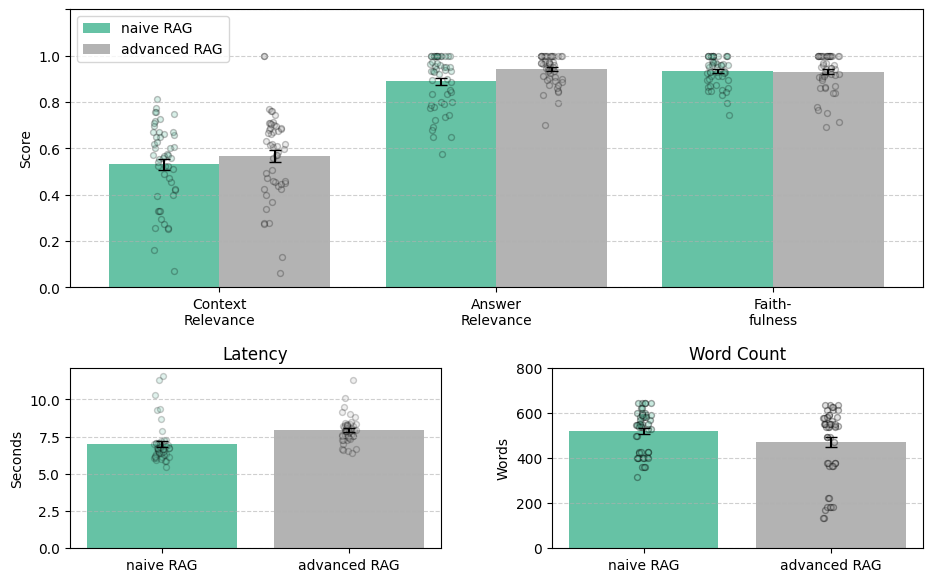

In [3]:
from src.utils.get_plots import plot_rag_metrics 

plot_rag_metrics(metrics_dfs, detailed_dfs)

Hier sind die Unterschiede eher marginal, es scheint eine Verbesserung der **context- (~ 3%) und answer relevancy (~ 6%)** zu geben (wobei die statistische Signifikanz fraglich ist). Auf der anderen Seite ist die **Latenz  (~ 1 s)** etwas erhöht.<br>
Ein klassisches Beispiel für eine Kosten-Nutzen Analyse. Ist mir der (zugegebeneamaßen mäßige) Nutzen durch den Anstieg in der Performance der erhöhte Kostenaufwand durch die Wartezeit wert?<br>
Die Entscheidung hängt vom genauen use-case ab.